# Word2Vec and LDA
https://www.kaggle.com/code/jl18pg052/word-embedding-word2vec-topic-modelling-lda

### Extracting informations from Text using Text Mining Techniques

Import Libraries

In [152]:
import pandas as pd
import numpy as np
import re, nltk
import spacy
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nlp = spacy.load('en_core_web_sm')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
from wordcloud import WordCloud
from gensim.models import Word2Vec
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
from sklearn.manifold import TSNE

from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Import `module_details_labelled.csv` Dataset

In [153]:
data = pd.read_csv("module_details_labelled.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,School,Major,Course_Code,Course_Name,Course_Description,Prereq,Category
0,NUS,Data Science and Analytics,DSA1101,Introduction to Data Science,"The abundance of data being harvested from various sectors of today’s society increases the demand for skilled data science practitioners. This course introduces foundational data science concepts to prepare students for tackling real-world data analytic challenges. Major topics include basic concepts in probability and statistics, data manipulation, supervised and unsupervised learning, model validation and big data analysis, alongside special topics discussed in guest lectures delivered by practicing data scientists from government and industry. Throughout the course, students will learn fundamental R programming skills to implement and apply the data science methods in motivating realworld case studies from diverse fields.","{'or': ['MA1301:D', 'MA1301FC:D', 'MA1301X:D']}",Core
1,NUS,Data Science and Analytics,CS2040,Data Structures and Algorithms,"This course introduces students to the design and implementation of fundamental data structures and algorithms. The course covers basic data structures (linked lists, stacks, queues, hash tables, binary heaps, trees, and graphs), searching and sorting algorithms, and basic analysis of algorithms.","{'or': ['CS1010:D', 'CS1010E:D', 'CS1010X:D', 'CS1101S:D', 'CS1010S:D', 'CS1010J:D']}",Core
2,NUS,Data Science and Analytics,DSA2101,Essential Data Analytics Tools: Data Visualisation,"Data visualisation is an essential tool for data analytics. This course is an introduction to data cleaning, exploration, analysis and visualisation. Students will learn how to take raw data, extract meaningful information, use statistical tools, and make visualisations. Topics include: programming in R, introduction to data storage systems, data manipulation, exploratory data analysis, dimension reduction, statistical graphics for univariate, multivariate (high-dimensional), temporal and spatial data, basic design principles and critical evaluation of visual displays of data.","{'and': [{'or': ['BT1101:D', 'DSA1101:D', 'DSE1101:D', 'GEA1000:D', 'GER1000%:D', 'IE1111R:D', 'ST1131:D']}, {'or': ['MA2401:D', {'and': [{'or': ['MA2001:D', 'MA1101R:D', 'MA1311:D', 'MA1508E:D', 'MA1513:D', 'MA1522:D']}, {'or': ['ST2334:D', 'ST2131:D', 'MA2116:D', 'MA2216:D']}]}]}]}",Core
3,NUS,Data Science and Analytics,DSA2102,Essential Data Analytics Tools: Numerical Computation,"This course aims at introducing basic concepts and wellestablished numerical methods that are very related to the computing foundation of data science and analytics. The emphasis is on the tight integration of numerical algorithms, implementation in industrial programming language, and examination on practical examples drawn from various disciplines related to data science. Major topics include: computer arithmetic, matrix multiplication, numerical methods for solving linear systems, least squares method, interpolation, concrete implementations in industrial program language, and sample applications related to data science.","{'and': [{'or': ['MA1101R:D', 'MA1508E:D', 'MA1513:D', 'MA1522:D', 'MA2001:D']}, {'or': ['MA1102R:D', 'MA1312:D', 'MA1505:D', 'MA1511:D', 'MA1521:D', 'MA2002:D']}]}",Core
4,NUS,Data Science and Analytics,MA2001,Linear Algebra I,"This course is a first course in linear algebra. Fundamental concepts of linear algebra will be introduced and investigated in the context of the Euclidean spaces R^n. Proofs of results will be presented in the concrete setting. Students are expected to acquire computational facilities and geometric intuition with regard to vectors and matrices. Some applications will be presented. Major topics: Systems of linear equations, matrices, determinants, Euclidean spaces, linear combinations and linear span, subspaces, linear independence, bases and dimension, rank of a matrix, inner products, eigenvalues and eigenvectors, diagonalization, linear transformations between

Dataset Description

In [154]:
print(data.columns)
print(len(data.columns))
print(data.shape)
print(data.info())
print(data.isnull().sum())

Index(['School', 'Major', 'Course_Code', 'Course_Name', 'Course_Description',
       'Prereq', 'Category'],
      dtype='object')
7
(530, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   School              530 non-null    object
 1   Major               530 non-null    object
 2   Course_Code         530 non-null    object
 3   Course_Name         530 non-null    object
 4   Course_Description  530 non-null    object
 5   Prereq              297 non-null    object
 6   Category            530 non-null    object
dtypes: object(7)
memory usage: 29.1+ KB
None
School                  0
Major                   0
Course_Code             0
Course_Name             0
Course_Description      0
Prereq                233
Category                0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Getting Relevant modules (not part of core curriculum and GE)

In [155]:
# get only core modules (now includes electives)
core1 = ['Core', 'Elective']
data_core = data.loc[data['Category'].isin(core1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [156]:
data_core

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,School,Major,Course_Code,Course_Name,Course_Description,Prereq,Category
0,NUS,Data Science and Analytics,DSA1101,Introduction to Data Science,"The abundance of data being harvested from various sectors of today’s society increases the demand for skilled data science practitioners. This course introduces foundational data science concepts to prepare students for tackling real-world data analytic challenges. Major topics include basic concepts in probability and statistics, data manipulation, supervised and unsupervised learning, model validation and big data analysis, alongside special topics discussed in guest lectures delivered by practicing data scientists from government and industry. Throughout the course, students will learn fundamental R programming skills to implement and apply the data science methods in motivating realworld case studies from diverse fields.","{'or': ['MA1301:D', 'MA1301FC:D', 'MA1301X:D']}",Core
1,NUS,Data Science and Analytics,CS2040,Data Structures and Algorithms,"This course introduces students to the design and implementation of fundamental data structures and algorithms. The course covers basic data structures (linked lists, stacks, queues, hash tables, binary heaps, trees, and graphs), searching and sorting algorithms, and basic analysis of algorithms.","{'or': ['CS1010:D', 'CS1010E:D', 'CS1010X:D', 'CS1101S:D', 'CS1010S:D', 'CS1010J:D']}",Core
2,NUS,Data Science and Analytics,DSA2101,Essential Data Analytics Tools: Data Visualisation,"Data visualisation is an essential tool for data analytics. This course is an introduction to data cleaning, exploration, analysis and visualisation. Students will learn how to take raw data, extract meaningful information, use statistical tools, and make visualisations. Topics include: programming in R, introduction to data storage systems, data manipulation, exploratory data analysis, dimension reduction, statistical graphics for univariate, multivariate (high-dimensional), temporal and spatial data, basic design principles and critical evaluation of visual displays of data.","{'and': [{'or': ['BT1101:D', 'DSA1101:D', 'DSE1101:D', 'GEA1000:D', 'GER1000%:D', 'IE1111R:D', 'ST1131:D']}, {'or': ['MA2401:D', {'and': [{'or': ['MA2001:D', 'MA1101R:D', 'MA1311:D', 'MA1508E:D', 'MA1513:D', 'MA1522:D']}, {'or': ['ST2334:D', 'ST2131:D', 'MA2116:D', 'MA2216:D']}]}]}]}",Core
3,NUS,Data Science and Analytics,DSA2102,Essential Data Analytics Tools: Numerical Computation,"This course aims at introducing basic concepts and wellestablished numerical methods that are very related to the computing foundation of data science and analytics. The emphasis is on the tight integration of numerical algorithms, implementation in industrial programming language, and examination on practical examples drawn from various disciplines related to data science. Major topics include: computer arithmetic, matrix multiplication, numerical methods for solving linear systems, least squares method, interpolation, concrete implementations in industrial program language, and sample applications related to data science.","{'and': [{'or': ['MA1101R:D', 'MA1508E:D', 'MA1513:D', 'MA1522:D', 'MA2001:D']}, {'or': ['MA1102R:D', 'MA1312:D', 'MA1505:D', 'MA1511:D', 'MA1521:D', 'MA2002:D']}]}",Core
4,NUS,Data Science and Analytics,MA2001,Linear Algebra I,"This course is a first course in linear algebra. Fundamental concepts of linear algebra will be introduced and investigated in the context of the Euclidean spaces R^n. Proofs of results will be presented in the concrete setting. Students are expected to acquire computational facilities and geometric intuition with regard to vectors and matrices. Some applications will be presented. Major topics: Systems of linear equations, matrices, determinants, Euclidean spaces, linear combinations and linear span, subspaces, linear independence, bases and dimension, rank of a matrix, inner products, eigenvalues and eigenvectors, diagonalization, linear transformations between

In [157]:
data_core.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(338, 7)

### Text Cleaning

Now let's start the text cleaning process.

In [158]:
def cleaned_text(text):
    clean = re.sub("\n"," ",text)
    clean=clean.lower()
    clean=re.sub(r"[~.,%/:;?_&+*=!-]"," ",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data_core["cleaned_descriptions"]=data_core["Course_Description"].apply(cleaned_text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence '\s'
<>:7: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-158-36c839fa7b85>:7: DeprecationWarning: invalid escape sequence '\s'
  clean=re.sub("\s{2,}"," ",clean)
<ipython-input-158-36c839fa7b85>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["cleaned_descriptions"]=data_core["Course_Description"].apply(cleaned_text)


In [159]:
data_core

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,School,Major,Course_Code,Course_Name,Course_Description,Prereq,Category,cleaned_descriptions
0,NUS,Data Science and Analytics,DSA1101,Introduction to Data Science,"The abundance of data being harvested from various sectors of today’s society increases the demand for skilled data science practitioners. This course introduces foundational data science concepts to prepare students for tackling real-world data analytic challenges. Major topics include basic concepts in probability and statistics, data manipulation, supervised and unsupervised learning, model validation and big data analysis, alongside special topics discussed in guest lectures delivered by practicing data scientists from government and industry. Throughout the course, students will learn fundamental R programming skills to implement and apply the data science methods in motivating realworld case studies from diverse fields.","{'or': ['MA1301:D', 'MA1301FC:D', 'MA1301X:D']}",Core,the abundance of data being harvested from various sectors of today s society increases the demand for skilled data science practitioners this course introduces foundational data science concepts to prepare students for tackling real world data analytic challenges major topics include basic concepts in probability and statistics data manipulation supervised and unsupervised learning model validation and big data analysis alongside special topics discussed in guest lectures delivered by practicing data scientists from government and industry throughout the course students will learn fundamental r programming skills to implement and apply the data science methods in motivating realworld case studies from diverse fields
1,NUS,Data Science and Analytics,CS2040,Data Structures and Algorithms,"This course introduces students to the design and implementation of fundamental data structures and algorithms. The course covers basic data structures (linked lists, stacks, queues, hash tables, binary heaps, trees, and graphs), searching and sorting algorithms, and basic analysis of algorithms.","{'or': ['CS1010:D', 'CS1010E:D', 'CS1010X:D', 'CS1101S:D', 'CS1010S:D', 'CS1010J:D']}",Core,this course introduces students to the design and implementation of fundamental data structures and algorithms the course covers basic data structures linked lists stacks queues hash tables binary heaps trees and graphs searching and sorting algorithms and basic analysis of algorithms
2,NUS,Data Science and Analytics,DSA2101,Essential Data Analytics Tools: Data Visualisation,"Data visualisation is an essential tool for data analytics. This course is an introduction to data cleaning, exploration, analysis and visualisation. Students will learn how to take raw data, extract meaningful information, use statistical tools, and make visualisations. Topics include: programming in R, introduction to data storage systems, data manipulation, exploratory data analysis, dimension reduction, statistical graphics for univariate, multivariate (high-dimensional), temporal and spatial data, basic design principles and critical evaluation of visual displays of data.","{'and': [{'or': ['BT1101:D', 'DSA1101:D', 'DSE1101:D', 'GEA1000:D', 'GER1000%:D', 'IE1111R:D', 'ST1131:D']}, {'or': ['MA2401:D', {'and': [{'or': ['MA2001:D', 'MA1101R:D', 'MA1311:D', 'MA1508E:D', 'MA1513:D', 'MA1522:D']}, {'or': ['ST2334:D', 'ST2131:D', 'MA2116:D', 'MA2216:D']}]}]}]}",Core,data visualisation is an essential tool for data analytics this course is an introduction to data cleaning exploration analysis and visualisation students will learn how to take raw data extract meaningful information use statistical tools and make visualisations topics include programming in r introduction to data storage systems data manipulation exploratory data analysis dimension reduction statistical graphics for univariate multivariate high dimensional temporal and spatial data basic design principles and critical evaluation of visual displays of data
3,NUS,Data Science and Analytics

Join words into sentences

In [160]:
data_core["cleaned_descriptions"] = data_core["cleaned_descriptions"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-160-c532bb727fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["cleaned_descriptions"] = data_core["cleaned_descriptions"].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3]))


In [161]:
data_core["cleaned_descriptions"].head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                                                                                                               abundance data being harvested from various sectors today society increases demand skilled data science practitioners this course introduces foundational data science concepts prepare students tackling real world data analytic challenges major topics include basic concepts probability statistics data manipulation supervised unsupervised learning model validation data analysis alongside special topics discussed guest lectures delivered practicing data scientists from government industry throughout course students will learn fundamental programming skills implement apply data science methods motivating realworld case studies from diverse fields
1                                                                                                                                                                                                                            

Tokenise words before lemmatising

In [162]:
data_core["tokenized"]=data_core["cleaned_descriptions"].apply(lambda x: nltk.word_tokenize(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-162-18298e665948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["tokenized"]=data_core["cleaned_descriptions"].apply(lambda x: nltk.word_tokenize(x))


In [163]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data_core["lemmatized"]=data_core["tokenized"].apply(lambda x: word_lemmatizer(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-163-b2a94e0bfe00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["lemmatized"]=data_core["tokenized"].apply(lambda x: word_lemmatizer(x))


In [164]:
# joins tokenized words into sentences
data_core["lemmatize_joined"]=data_core["lemmatized"].apply(lambda x: ' '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-164-6d3c9401d263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["lemmatize_joined"]=data_core["lemmatized"].apply(lambda x: ' '.join(x))


### Topic Modelling using LDA

The input will be in the form of document-term matrix, and we will convert that using the below piece of code.

In [165]:
lemmatized_stuff = data_core["lemmatized"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [166]:
dictionary = corpora.Dictionary(lemmatized_stuff)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemmatized_stuff]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Try for a range of topics and narrow down to a smaller range we want to work with based on the coherence score obtained (evaluation metric).

In [167]:
LDA = gensim.models.ldamodel.LdaModel
scores = []
num = []

# Build LDA model
def lda_stuff(i):
  lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=i, random_state=100,
                chunksize=200, passes=100)
  lda_model.print_topics()
  coherence_model_lda = CoherenceModel(model=lda_model,
  texts=lemmatized_stuff, dictionary=dictionary, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  return i, coherence_lda

for i in range(1,10):
  num_val, result_val = lda_stuff(i)
  num += [num_val]
  scores += [result_val]
  print(f"Number of Topics: {num_val} and Coherence Score: {result_val}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 1 and Coherence Score: 0.46523808764457586
Number of Topics: 2 and Coherence Score: 0.4043737613459679
Number of Topics: 3 and Coherence Score: 0.415561074762472
Number of Topics: 4 and Coherence Score: 0.38857452604842413
Number of Topics: 5 and Coherence Score: 0.39799737536175683
Number of Topics: 6 and Coherence Score: 0.3694139810380804
Number of Topics: 7 and Coherence Score: 0.3934445895450274
Number of Topics: 8 and Coherence Score: 0.37947079420432483
Number of Topics: 9 and Coherence Score: 0.4047117273707244


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


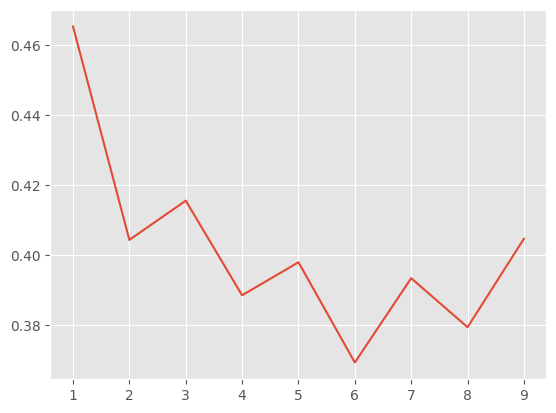

In [168]:
plt.plot(num, scores)

From the line plot above, we can see that 1 has the highest coherence score, followed closely by 3. Since 1 will be too few based on our knowledge as data science students (data science does not comprise only of 1 components), we will try for a range of 3 to 6. In this particular file, we will only be trying with 4 topics.

### Using optimal number of topics = 4

In [169]:
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=4, random_state=100,
                chunksize=200, passes=100)
lda_model.print_topics()
coherence_model_lda = CoherenceModel(model=lda_model,
texts=lemmatized_stuff, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.38857452604842413


### WordClouds for Topics' Keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


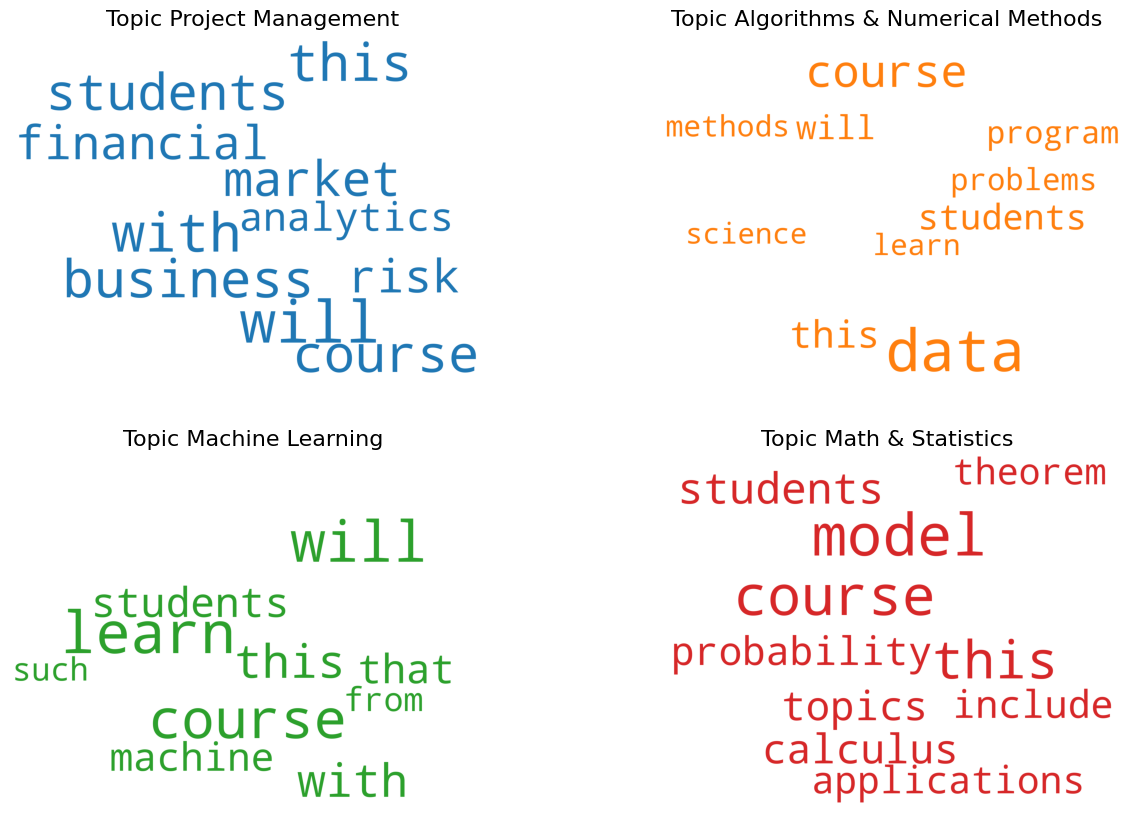

In [170]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

# Topic Labelling
topic_labels = {
    0: 'Project Management',
    1: 'Algorithms & Numerical Methods',
    2: 'Machine Learning',
    3: 'Math & Statistics'
}

fig, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + topic_labels[i], fontdict=dict(size=16))
    plt.gca().axis('off')

### Dominant topic for each Document

Using below piece of code we will try to find the dominant topic for each document.

In [171]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([topic_labels[topic_num], round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=lemmatized_stuff)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-171-843ecbb813ad>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([topic_labels[topic_num], round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-171-843ecbb813ad>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([topic_labels[topic_num], round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-171-843ecbb813ad>:15

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Algorithms & Numerical Methods,0.6706,"data, course, this, students, will, program, problems, methods, learn, science","[abundance, data, be, harvest, from, various, sectors, today, society, increase, demand, skilled, data, science, practitioners, this, course, introduce, foundational, data, science, concepts, prepare, students, tackle, real, world, data, analytic, challenge, major, topics, include, basic, concepts, probability, statistics, data, manipulation, supervise, unsupervised, learn, model, validation, data, analysis, alongside, special, topics, discuss, guest, lecture, deliver, practice, data, scientists, from, government, industry, throughout, course, students, will, learn, fundamental, program, skills, implement, apply, data, science, methods, motivate, realworld, case, study, from, diverse, field]"
1,1,Algorithms & Numerical Methods,0.9760,"data, course, this, students, will, program, problems, methods, learn, science","[this, course, introduce, students, design, implementation, fundamental, data, structure, algorithms, course, cover, basic, data, structure, link, list, stack, queue, hash, table, binary, heap, tree, graph, search, sort, algorithms, basic, analysis, algorithms]"
2,2,Algorithms & Numerical Methods,0.9867,"data, course, this, students, will, program, problems, methods, learn, science","[data, visualisation, essential, tool, data, analytics, this, course, introduction, data, clean, exploration, analysis, visualisation, students, will, learn, take, data, extract, meaningful, information, statistical, tool, make, visualisations, topics, include, program, introduction, data, storage, systems, data, manipulation, exploratory, data, analysis, dimension, reduction, statistical, graphics, univariate, multivariate, high, dimensional, temporal, spatial, data, basic, design, principles, critical, evaluation, visual, display, data]"
3,3,Algorithms & Numerical Methods,0.8799,"data, course, this, students, will, program, problems, methods, learn, science","[this, course, aim, introduce, basic, concepts, wellestablished, numerical, methods, that, very, relate, compute, foundation, data, science, analytics, emphasis, tight, integration, numerical, algorithms, implementation, industrial, program, language, examination, practical, examples, draw, from, various, discipline, relate, data, science, major, topics, include, computer, arithmetic, matrix, multiplication, numerical, methods, solve, linear, systems, least, square, method, interpolation, concrete, implementations, industrial, program, language, sample, applications, relate, data, science]"
4,4,Algorithms & Numerical Methods,0.9888,"data, course, this, students, will, program, problems, methods, learn, science","[this, course, first, course, linear, algebra, fundamental, concepts, linear, algebra, will, introduce, investigate, context, euclidean, space, proof, result, will, present, concrete, set, students, expect, acquire, computational, facilities, geometric, intuition, with, regard, vectors, matrices, some, applications, will, present, major, topics, systems, linear, equations, matrices, determinants, euclidean, space, linear, combinations, linear, span, subspaces, linear, independence, base, dimension, rank, matrix, inner, products, eigenvalues, eigenvectors, diagonalization, linear, transformations, between, euclidean, space, applications]"
5,5,Math & Statistics,0.9895,"model, course, this, students, calculus, topics, probability, include, applications, theorem","[this, course, single, variable, calculus, will, introduce, precise, definitions, limit, continuity, derivative, riemann, integral, students, will, expose, computational, techniques, applications, differentiation, integration, this, course, conclude, with, introduction, first, order, differential, equations, major, topics, function, limit, continuity, derivative, intermediate, value, theorem, chain, rule, implicit, differentiation, hig

Keyword above represents the most occuring words for a particular topic. Also there is weight of that topic in that document. This is so good!! Isn't it?? I am so thrilled!!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-172-2fd7835b7533>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


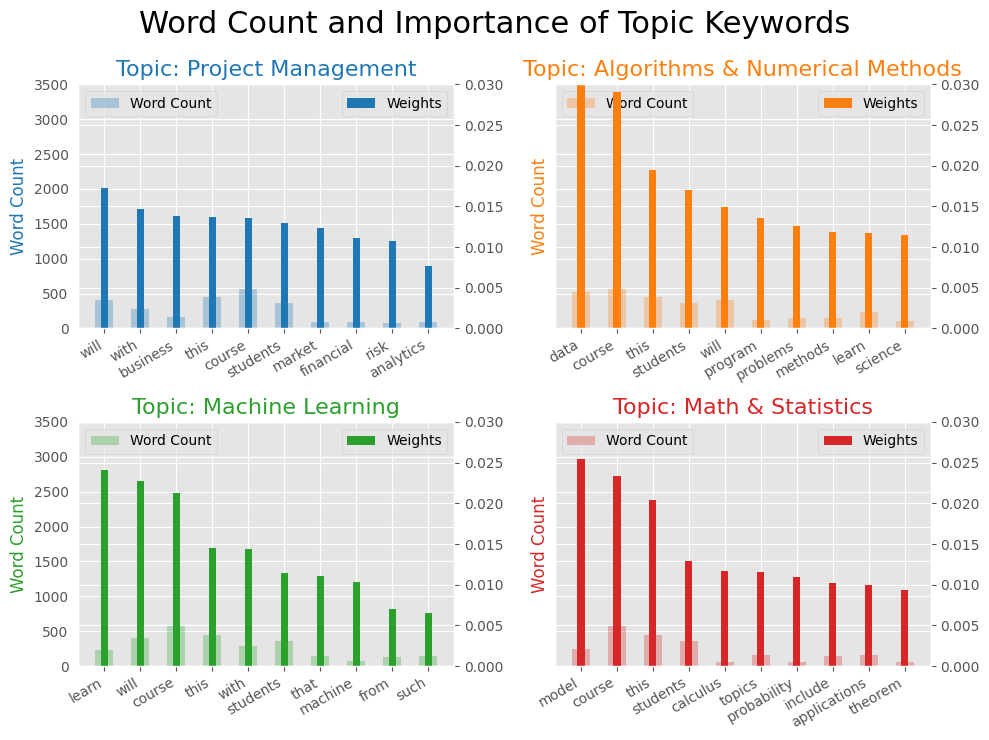

In [172]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in lemmatized_stuff for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,7), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + topic_labels[i], color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

Here I have limited the word count to 3500.

Now let's see how many documents belong to each topic visually.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Number of documents')

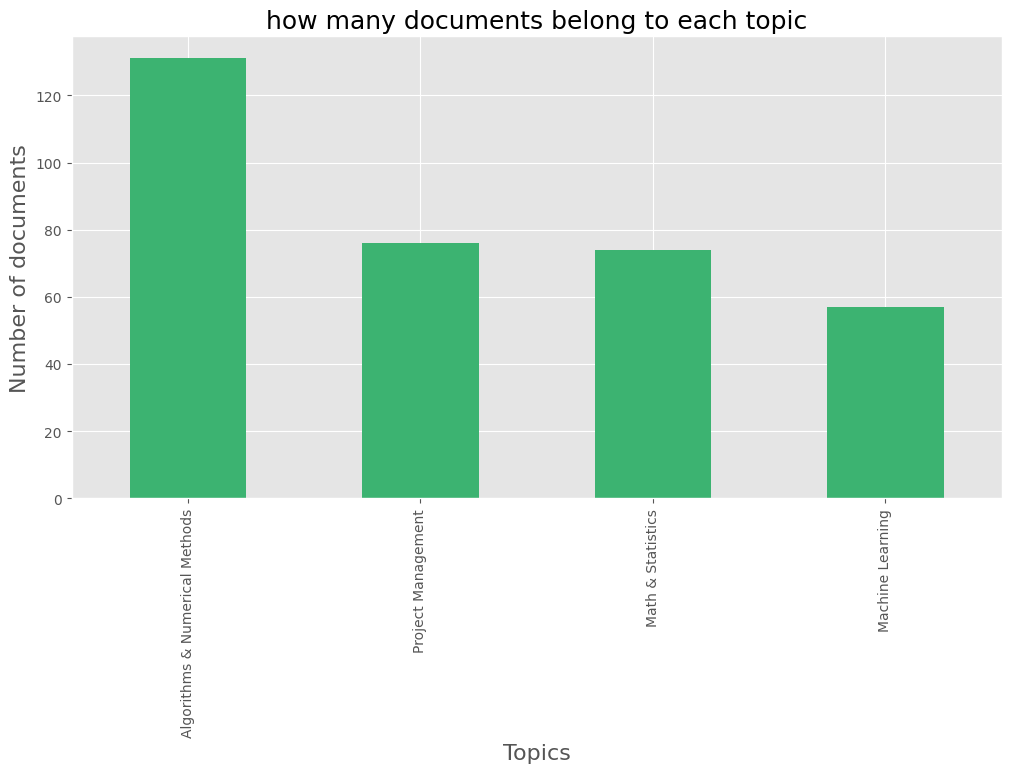

In [173]:
topic_counts = df_dominant_topic["Dominant_Topic"].value_counts()
topic_counts.plot(kind = "bar", color = "mediumseagreen", figsize = (12,6))
plt.title("how many documents belong to each topic", size = 18)
plt.xlabel("Topics", size = 16)
plt.ylabel("Number of documents", size = 16)

So from the above we can see that most documents belong to topic 1, we will later label the topic names, based on the wordclouds, once we generate for each topic.

### Word Clouds for each topic

In [174]:
data_core["Dominant Topic"] = df_dominant_topic["Dominant_Topic"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-174-e87f44796d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_core["Dominant Topic"] = df_dominant_topic["Dominant_Topic"]


Project Management (Business)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'WordCloud for Project Management')

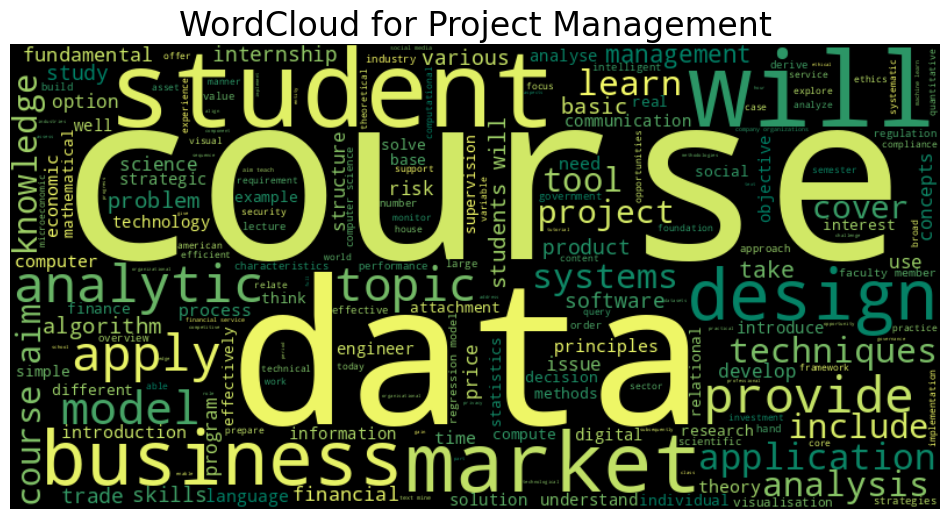

In [175]:
cloud=WordCloud(colormap="summer",width=800,height=400).generate(str(data_core[data_core["Dominant Topic"]=="Project Management"]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Project Management", size = 24)

Algorithms & Numerical Methods

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'WordCloud for Algorithms & Numerical Methods')

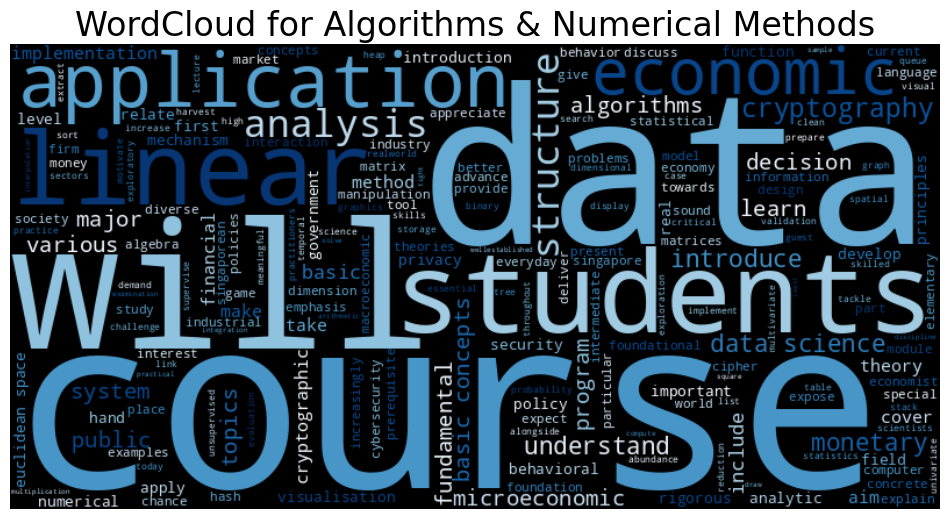

In [176]:
cloud=WordCloud(colormap="Blues",width=800,height=400).generate(str(data_core[data_core["Dominant Topic"]=="Algorithms & Numerical Methods"]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Algorithms & Numerical Methods", size = 24)

Machine Learning

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'WordCloud for Machine Learning')

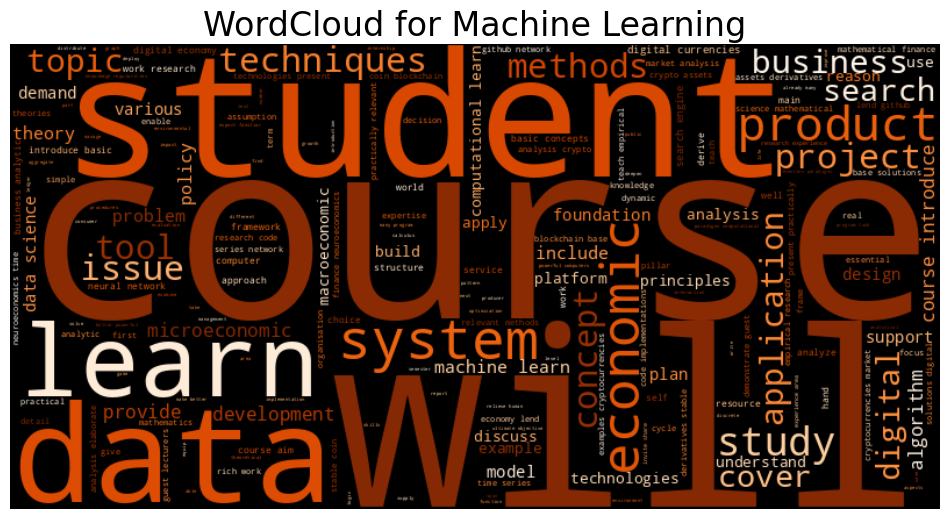

In [177]:
cloud=WordCloud(colormap="Oranges",width=800,height=400).generate(str(data_core[data_core["Dominant Topic"]=="Machine Learning"]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Machine Learning", size = 24)

Math & Statistics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


Text(0.5, 1.0, 'WordCloud for Math & Statistics')

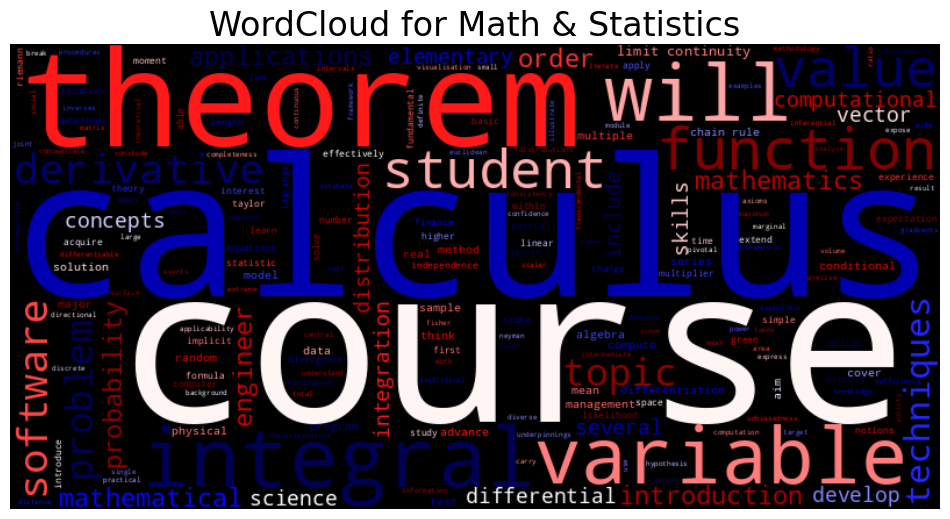

In [178]:
cloud=WordCloud(colormap="seismic",width=800,height=400).generate(str(data_core[data_core["Dominant Topic"]=="Math & Statistics"]["lemmatize_joined"]))
fig=plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.title("WordCloud for Math & Statistics", size = 24)

### Most Salient Terms

> Finding out most important/relevant terms associated with each topic in model.



In [179]:
pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [180]:
# MUST USE THIS VERSION
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [181]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

# Enable notebook mode for pyLDAvis
pyLDAvis.enable_notebook()

# Assuming you have your LDA model, document-term matrix, and dictionary ready
# lda_model, doc_term_matrix, dictionary = ...

# Generate the pyLDAvis visualization directly
LDAvis_prepared = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# Display the visualization
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.033744  0.158805       1        1  35.548682
0      0.120214 -0.083629       2        1  25.018162
2      0.096965  0.005785       3        1  19.874483
3     -0.183435 -0.080961       4        1  19.558673, topic_info=         Term        Freq       Total Category  logprob  loglift
11       data  514.000000  514.000000  Default  30.0000  30.0000
28      learn  217.000000  217.000000  Default  29.0000  29.0000
39    program  117.000000  117.000000  Default  28.0000  28.0000
33      model  222.000000  222.000000  Default  27.0000  27.0000
431    market   78.000000   78.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
32    methods   38.145249  137.440662   Topic4  -4.7865   0.3500
178      with   38.866821  258.423935   Topic4  -4.7678  -0.2627
2    analysis   32.077756  153.856340   Topic4  -4.9598   0.0639
129    linear   27.528664   93.362593   Topic4  -5.1127   0.4105
61       will   27.228947  358.265039   Topic4  -5.1236  -0.9452

[302 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
292       1  0.247107        able
292       3  0.049421        able
292       4  0.716610        able
976       2  0.926901  activities
1541      4  0.912514   actuarial
...     ...       ...         ...
178       4  0.150915        with
62        1  0.663181       world
62        2  0.132636       world
62        3  0.165795       world
62        4  0.033159       world

[461 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

### Determine Topic of a New Document

In [182]:
def preprocess_new_document(document):
    # Step 1: Remove words with length less than or equal to 3
    cleaned_text_document = cleaned_text(document)
    remove_function = lambda x: ' '.join([word for word in x.split() if len(word)>3])
    cleaned_removed_short_words_document = remove_function(cleaned_text_document)

    # Step 2: Tokenize the cleaned text
    tokenized_text_document = nltk.word_tokenize(cleaned_removed_short_words_document)

    # Step 3: Lemmatize the tokens
    lemmatized_text_document =  word_lemmatizer(tokenized_text_document)

    # Step 4: Remove stopwords
    join_text = ' '.join([word for word in lemmatized_text_document])
    return join_text

# Example usage of the function
new_document = "This course teaches neural networks, and popular models such as Random Forest and XGBoost."
preprocessed_document = preprocess_new_document(new_document)
print(preprocessed_document)


this course teach neural network popular model such random forest xgboost


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [183]:
def get_document_topic(ldamodel, doc_term_matrix):
    topic_labels = {
    0: 'Project Management',
    1: 'Algorithms & Numerical Methods',
    2: 'Machine Learning',
    3: 'Math & Statistics'
}

    topic_scores = ldamodel.get_document_topics(doc_term_matrix)
    print(topic_scores)
    dominant_topic = max(topic_scores, key=lambda x: x[1])[0]
    topic_keywords = ", ".join([word for word, prop in ldamodel.show_topic(dominant_topic)])

    # relabel topic
    labelled_dominant_topic = topic_labels[dominant_topic]
    return labelled_dominant_topic, topic_keywords

def assign_cluster(new_document, ldamodel, dictionary):
    # Preprocess the new document
    preprocessed_doc = preprocess_new_document(new_document)

    # Convert the preprocessed document to a list of tokens
    tokens = preprocessed_doc.split()  # Split the string into tokens

    # Convert the tokens to a bag-of-words vector using the dictionary
    new_bow = dictionary.doc2bow(tokens)

    # Get the dominant topic and keywords for the new document
    dominant_topic, topic_keywords = get_document_topic(ldamodel, new_bow)

    # Topic distribution
    topic_distribution = lda_model.get_document_topics(new_bow)

    # Relabel the topic distribution
    topic_labels = {
    0: 'Project Management',
    1: 'Algorithms & Numerical Methods',
    2: 'Machine Learning',
    3: 'Math & Statistics'
}

    result = []
    for i in range(len(topic_distribution)):
        topic_id, probability = topic_distribution[i]
        topic_label = topic_labels.get(topic_id)
        result.append((topic_label, probability))

    return dominant_topic, topic_keywords, result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Insert new document here

> Test with course and job descriptions.



In [184]:
new_document = f"Knowledge of developing Deep Learning/Computer Vision and classic ML models for practical applications \
Proficiency in deep learning frameworks such as PyTorch, TensorFlow/Keras, or Caffe \
Experienced in Java, Kotlin, Swift, and Flutter is a plus\
Strong communication skills to understand business stakeholders' needs and effectively convey analytical results.\
Ability to write clear and concise technical documentation\
Ability to work independently and collaboratively within a team."
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(0, 0.33597767), (1, 0.19625163), (2, 0.41440922), (3, 0.053361513)]
Dominant Topic: Machine Learning
Topic Keywords: learn, will, course, this, with, students, that, machine, from, such
Topic Distribution: [('Project Management', 0.3359862), ('Algorithms & Numerical Methods', 0.19625036), ('Machine Learning', 0.4144226), ('Math & Statistics', 0.053340837)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
new_document = f"Opportunities & Exposure \Set up and maintain BI tools, infrastructure, and integration with company data sources.\
Manage end-to-end analyses; \
identify issues, gather information from various sources, analyse data, interpret patterns and trends, build models, give recommendations, and create insightful automated reports\
Automate and validate newly created reports and develop corrective actions to improve data integrity and quality\
Analyse existing reports and optimize them for standardization across the company.\
Creating and maintaining business requirements and other technical documentation.\
Support ad-hoc data requests, reporting\
Requirements\
On track to graduate from bachelor’s degree in Statistics, Mathematics, Computer Science, or another analytical field\
Adept at the use of BI reporting tools such as Tableau, Board, Power BI, Cognos Analytics, SAP BusinessObjects\
Analytical mind and business acumen with ability to work with large amounts of data to discover patterns and trends and to form conclusions based on findings. Must be extremely detailed oriented.\
Excellent analytical skills, independent thinking, data oriented, and knowledge of analytics tools required (SQL, Excel, Tableau, Python, or R)\
Good communication and presentation skillsQuick learner and proven ability to handle multiple projects concurrently"
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(0, 0.49116102), (1, 0.32308853), (2, 0.1501361), (3, 0.035614338)]
Dominant Topic: Project Management
Topic Keywords: will, with, business, this, course, students, market, financial, risk, analytics
Topic Distribution: [('Project Management', 0.4911537), ('Algorithms & Numerical Methods', 0.32309055), ('Machine Learning', 0.15014638), ('Math & Statistics', 0.035609372)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\S'
<>:1: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-185-ab35088ed1be>:1: DeprecationWarning: invalid escape sequence '\S'
  new_document = f"Opportunities & Exposure \Set up and maintain BI tools, infrastructure, and integration with company data sources.\


In [186]:
new_document = f"Support the Macro team in their economics research.\
Track economic developments & media reports on ASEAN.\
Handle databases such as CEIC/Bloomberg and work with spreadsheets/poweroint /models."
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(0, 0.20971595), (1, 0.16760726), (2, 0.6082587), (3, 0.014418046)]
Dominant Topic: Machine Learning
Topic Keywords: learn, will, course, this, with, students, that, machine, from, such
Topic Distribution: [('Project Management', 0.20969853), ('Algorithms & Numerical Methods', 0.16760853), ('Machine Learning', 0.60827494), ('Math & Statistics', 0.014418041)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
new_document ="This course introduces students to the design and implementation of fundamental data structures and algorithms. The course covers basic data structures (linked lists, stacks, queues, hash tables, binary heaps, trees, and graphs), searching and sorting algorithms, and basic analysis of algorithms."
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(1, 0.9760107)]
Dominant Topic: Algorithms & Numerical Methods
Topic Keywords: data, course, this, students, will, program, problems, methods, learn, science
Topic Distribution: [('Algorithms & Numerical Methods', 0.97601014)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
new_document = f"This module applies advanced calculus to practical mathematical problems, and is for students with advanced calculus background and with interest in the applications of calculus. Major topics Sequences, series, power series. Vector algebra in R2 and R3. Scalar- and vector-valued functions of several variables. Partial derivatives, total differentials. Mean value Theorem. Taylor's formula. Jacobian. Chain rule. Lagrange multiplier. Multiple integrals."
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(3, 0.98397344)]
Dominant Topic: Math & Statistics
Topic Keywords: model, course, this, students, calculus, topics, probability, include, applications, theorem
Topic Distribution: [('Math & Statistics', 0.9839751)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
new_document = f"This course introduces basic concepts and algorithms in machine learning and neural networks. The main reason for studying computational learning is to make better use of powerful computers to learn knowledge (or regularities) from the raw data. The ultimate objective is to build self-learning systems to relieve human from some of already-too-many programming tasks. At the end of the course, students are expected to be familiar with the theories and paradigms of computational learning, and capable of implementing basic learning systems."
dominant_topic, topic_keywords, topic_distribution = assign_cluster(new_document, lda_model, dictionary)

print("Dominant Topic:", dominant_topic)
print("Topic Keywords:", topic_keywords)
print("Topic Distribution:", topic_distribution)

[(1, 0.43278128), (2, 0.55757207)]
Dominant Topic: Machine Learning
Topic Keywords: learn, will, course, this, with, students, that, machine, from, such
Topic Distribution: [('Algorithms & Numerical Methods', 0.43278685), ('Machine Learning', 0.5575665)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
